Question - Making a bluring function and applying it on an image.

For this I first have defined the different filters and then convolved the image with it to produce the blurred image.
I have shown the blurring operation performed on several images with different kernels.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [60]:
def box_filter(k):
    box = np.ones((k,k), dtype='float32')
    return box / (1.0/k)

In [61]:
def bilinear_filter():
    kernel = [[1,2,1], [2,4,2], [1,2,1]]
    kernel = np.array(kernel)
    return kernel / 16.0

In [62]:
print(bilinear_filter())

[[ 0.0625  0.125   0.0625]
 [ 0.125   0.25    0.125 ]
 [ 0.0625  0.125   0.0625]]


In [63]:
def gaussian_filter():
    kernel = [[1,4,6,4,1], [2,8,12,8,2], [6,24,36,24,6], [2,8,12,8,2], [1,4,6,4,1]]
    kernel = np.array(kernel)
    return kernel / 256.0

In [64]:
def zero_pad(image, k_size):
    pad_num = k_size // 2
    zeros = np.zeros((pad_num, image.shape[0]))
    new_image = np.pad(image, ((pad_num,pad_num), (pad_num, pad_num),(0, 0)), 'constant', constant_values=0)
    return new_image

In [65]:
def convolv(sub_image, kernel):
    total = 0
    for i in range(0, sub_image.shape[0]):
        for j in range(0, sub_image.shape[1]):
            total += sub_image[i,j] * kernel[i,j]
    return total        

In [66]:
def blur_image(image, kernel):
    print('Normal Image')
    plt.imshow(image)
    plt.show()
    image_height, image_width = image.shape[0], image.shape[1]
    kernel_size = kernel.shape[0]
    zero_padded_image = zero_pad(image, kernel_size)
    k_mid = kernel_size // 2
    new_image = np.zeros((image_height, image_width, 3), dtype='uint8')
    #for k in range(0, 3):
    for i in range(0, image_height):
        for j in range(0, image_width):
            sub_image_0 = zero_padded_image[i:i+kernel_size, j:j+kernel_size, 0]
            sub_image_1 = zero_padded_image[i:i+kernel_size, j:j+kernel_size, 1]
            sub_image_2 = zero_padded_image[i:i+kernel_size, j:j+kernel_size, 2]
            conv_value_0 = convolv(sub_image_0, kernel)
            conv_value_1 = convolv(sub_image_1, kernel)
            conv_value_2 = convolv(sub_image_2, kernel)
            conv_value_0 = conv_value_0 // np.sum(kernel)
            conv_value_1 = conv_value_1 // np.sum(kernel)
            conv_value_2 = conv_value_2 // np.sum(kernel)
            new_image[i,j,0] = conv_value_0
            new_image[i,j,1] = conv_value_1
            new_image[i,j,2] = conv_value_2
    return new_image
                    

Normal Image


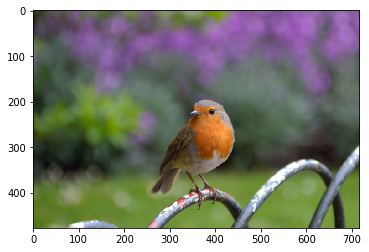

gaussian blur image


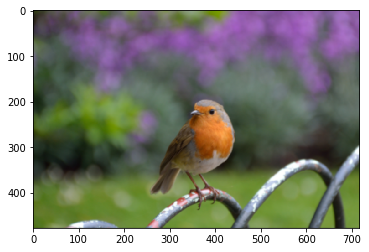

In [67]:
image = plt.imread("../sample.jpg")
kernel = gaussian_filter()
blured_image = blur_image(image, kernel)
print('gaussian blur image')
plt.imshow(blured_image)
plt.show()

Normal Image


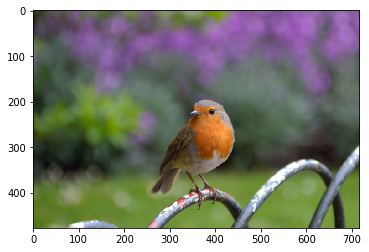

bilinear blur image


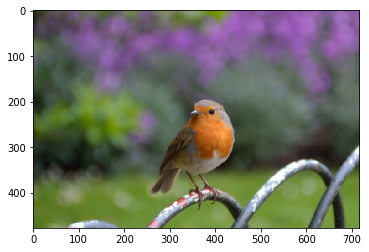

In [42]:
image = plt.imread("../sample.jpg")
kernel = bilinear_filter()
blured_image = blur_image(image, kernel)
print('bilinear blur image')
plt.imshow(blured_image)
plt.show()

Normal Image


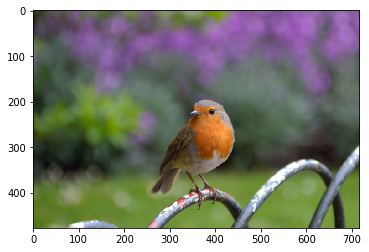

box filter blur image


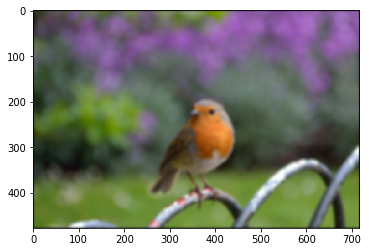

266.065512896


In [58]:
start_time = time.time()
image = plt.imread("../sample.jpg")
kernel = box_filter(9)
blured_image = blur_image(image, kernel)
print('box filter blur image')
plt.imshow(blured_image)
plt.show()
print(time.time() - start_time)

Normal Image


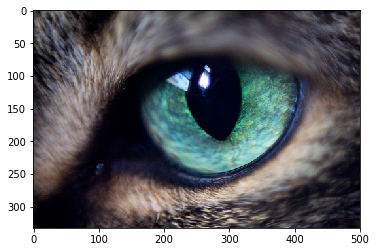

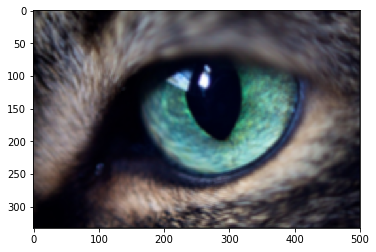

In [44]:
image = plt.imread("../pic.jpg")
kernel = box_filter(5)
blured_image = blur_image(image, kernel)
print("box filter blur image kernel 5 x 5")
plt.imshow(blured_image)
plt.show()

Normal Image


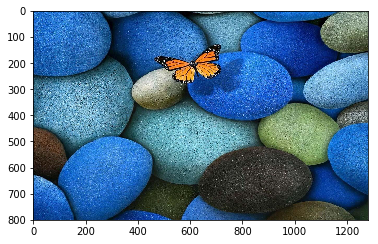

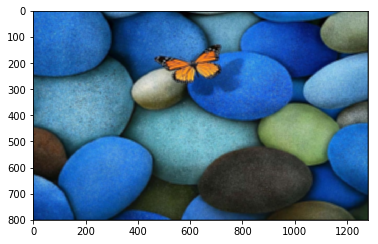

In [45]:
image = plt.imread("../pic2.jpg")
kernel = box_filter(9)
blured_image = blur_image(image, kernel)
print("box filter blur image kernel 9 x 9")
plt.imshow(blured_image)
plt.show()